<a href="https://colab.research.google.com/github/gnozadi/Cow-detection-segmentation/blob/main/detecion/YOLOv5_cow_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone the YOLOv5 repository

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 15921 (delta 17), reused 28 (delta 13), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.66 MiB | 25.97 MiB/s, done.
Resolving deltas: 100% (10916/10916), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


# Installing dependecies and Importing libraries

In [2]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


In [3]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets
import os
import cv2

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


# Mounting Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


bold text# Preprocessing Data

As the required input data size is 640x640 pixels, all the images in the dataset are resized accordingly.

In [5]:
def resize_input_image(d_path, size):
  image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
  imgs_list = [filename for filename in os.listdir(d_path) if os.path.splitext(filename)[-1] in image_extensions]
  for i, f in enumerate(imgs_list):
    img = cv2.imread(d_path+'/'+f)
    out=cv2.resize(img,(size,size),interpolation= cv2.INTER_LINEAR)
    cv2.imwrite(d_path+'/'+f, out)

In [6]:
all_paths = [
    "/content/drive/MyDrive/cow-dataset/train/images",
    "/content/drive/MyDrive/cow-dataset/test/images",
    "/content/drive/MyDrive/cow-dataset/valid/images"
]

for p in all_paths:
  resize_input_image(p, 640)

In [7]:
# import os
# import cv2
# d_path = "/content/drive/MyDrive/cow-dataset/train/images"
# image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
# imgs_list = [filename for filename in os.listdir(d_path) if os.path.splitext(filename)[-1] in image_extensions]
# for i, f in enumerate(imgs_list):
#   img = cv2.imread(d_path+'/'+f)
#   out=cv2.resize(img,(640,640),interpolation= cv2.INTER_LINEAR)
#   cv2.imwrite(d_path+'/'+f, out)

In [8]:
# import os
# import cv2
# d_path = "/content/drive/MyDrive/cow-dataset/test/images"
# image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
# imgs_list = [filename for filename in os.listdir(d_path) if os.path.splitext(filename)[-1] in image_extensions]
# for i, f in enumerate(imgs_list):
#   img = cv2.imread(d_path+'/'+f)
#   out=cv2.resize(img,(640,640),interpolation= cv2.INTER_LINEAR)
#   cv2.imwrite(d_path+'/'+f, out)

In [9]:
# import os
# import cv2
# d_path = "/content/drive/MyDrive/cow-dataset/valid/images"
# image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
# imgs_list = [filename for filename in os.listdir(d_path) if os.path.splitext(filename)[-1] in image_extensions]
# for i, f in enumerate(imgs_list):
#   img = cv2.imread(d_path+'/'+f)
#   out=cv2.resize(img,(640,640),interpolation= cv2.INTER_LINEAR)
#   cv2.imwrite(d_path+'/'+f, out)

# Train the Model

we train the YOLOv5x with 50 epochs

In [10]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/cow-dataset/data.yaml --weights yolov5x.pt
# --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
2023-08-20 06:21:13.420415: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 06:21:14.300615: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5x.pt, cfg=, data=/content/drive/MyDrive/cow-dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank

In [11]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [12]:
!zip -r pic.zip runs/train/exp/

  adding: runs/train/exp/ (stored 0%)
  adding: runs/train/exp/opt.yaml (deflated 49%)
  adding: runs/train/exp/weights/ (stored 0%)
  adding: runs/train/exp/weights/last.pt (deflated 8%)
  adding: runs/train/exp/weights/best.pt (deflated 8%)
  adding: runs/train/exp/val_batch1_pred.jpg (deflated 5%)
  adding: runs/train/exp/P_curve.png (deflated 6%)
  adding: runs/train/exp/val_batch0_pred.jpg (deflated 5%)
  adding: runs/train/exp/PR_curve.png (deflated 10%)
  adding: runs/train/exp/val_batch1_labels.jpg (deflated 5%)
  adding: runs/train/exp/results.csv (deflated 83%)
  adding: runs/train/exp/hyp.yaml (deflated 45%)
  adding: runs/train/exp/labels.jpg (deflated 28%)
  adding: runs/train/exp/events.out.tfevents.1692512476.b71d78c448b0.3741.0 (deflated 34%)
  adding: runs/train/exp/F1_curve.png (deflated 6%)
  adding: runs/train/exp/train_batch0.jpg (deflated 1%)
  adding: runs/train/exp/val_batch0_labels.jpg (deflated 5%)
  adding: runs/train/exp/results.png (deflated 10%)
  adding: 

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import os
import glob
def test_image(image_path):
  # Display the output image
  # Replace with the actual paths
  input_photo_path = image_path
  model_weights_path = "/content/yolov5/runs/train/exp/weights/best.pt"

  # Run inference
  !python detect.py --source "{input_photo_path}" --weights "{model_weights_path}" --img-size 640 --conf 0.4 --iou 0.5
  output_directory = "/content/yolov5/runs/detect/"
  latest_output_image_path = max(glob.glob(os.path.join(output_directory, 'exp*', '*.jpg')), key=os.path.getctime)
  # Output filename format used by YOLOv5
  img = cv2.imread(latest_output_image_path)
  cv2_imshow(img)


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/NVR_ch6_main_20230730060002_20230730070002_frame_61950.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86247433 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/NVR_ch6_main_20230730060002_20230730070002_frame_61950.jpg: 640x640 1 stand-back, 1 stand-top, 2 stand-sides, 2 walk-backs, 87.3ms
Speed: 0.7ms pre-process, 87.3ms inference, 72.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


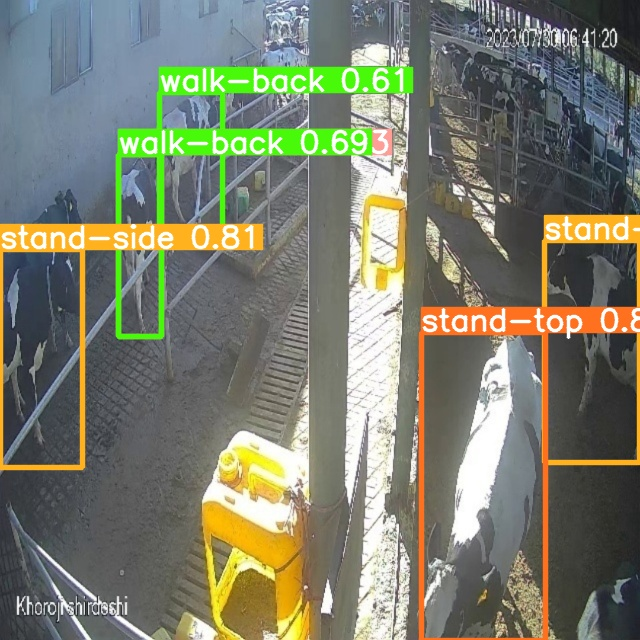



detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/NVR_ch6_main_20230730070002_20230730080002_frame_35175.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86247433 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/NVR_ch6_main_20230730070002_20230730080002_frame_35175.jpg: 640x640 1 stand-side, 88.3ms
Speed: 0.6ms pre-process, 88.3ms inference, 94.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


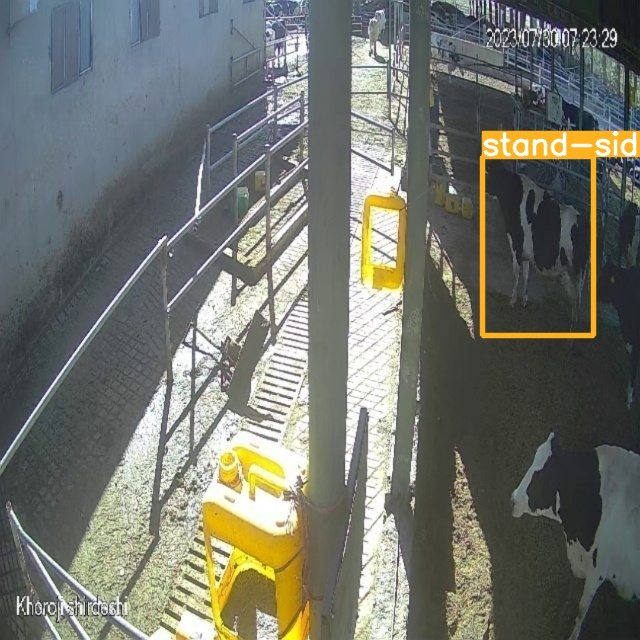



detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/NVR_ch6_main_20230730070002_20230730080002_frame_6825.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86247433 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/NVR_ch6_main_20230730070002_20230730080002_frame_6825.jpg: 640x640 2 stand-backs, 2 stand-sides, 69.5ms
Speed: 0.6ms pre-process, 69.5ms inference, 71.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


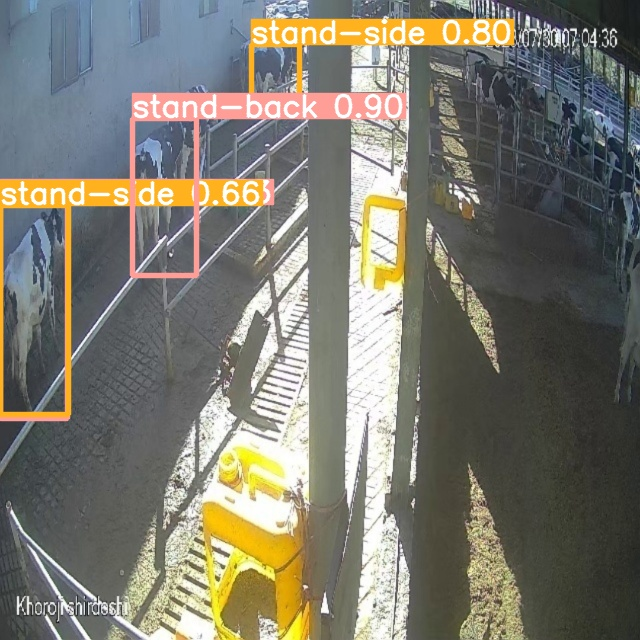



detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/NVR_ch6_main_20230730090002_20230730100002_frame_23625.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86247433 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/NVR_ch6_main_20230730090002_20230730100002_frame_23625.jpg: 640x640 4 stand-backs, 2 stand-sides, 87.2ms
Speed: 0.6ms pre-process, 87.2ms inference, 93.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


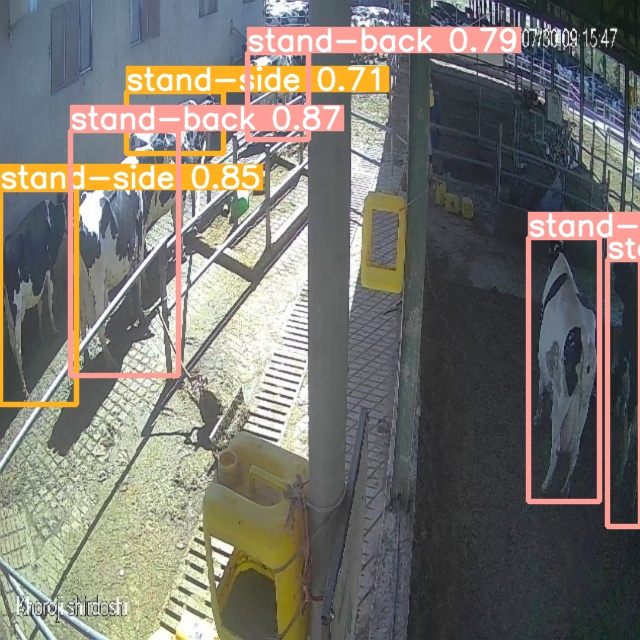



detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/NVR_ch6_main_20230730110002_20230730120002_frame_59850.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86247433 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/NVR_ch6_main_20230730110002_20230730120002_frame_59850.jpg: 640x640 1 stand-back, 2 stand-sides, 61.7ms
Speed: 0.6ms pre-process, 61.7ms inference, 99.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


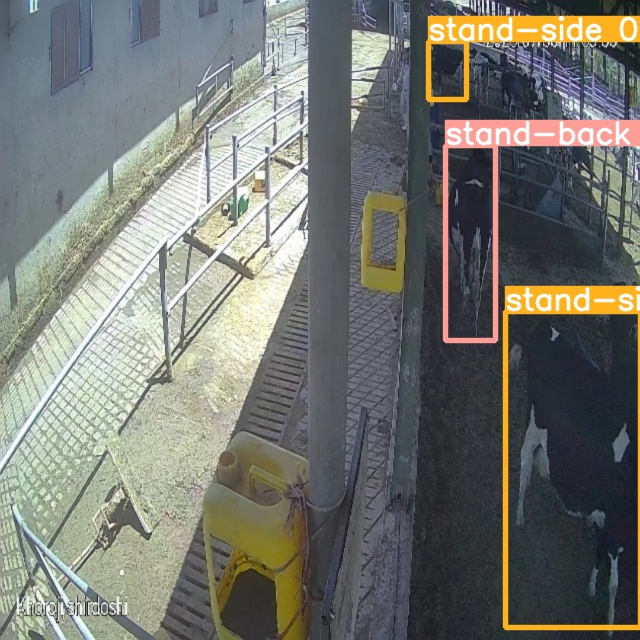

In [38]:
test_image("/content/NVR_ch6_main_20230730060002_20230730070002_frame_61950.jpg")
print("")
print("")
test_image("/content/NVR_ch6_main_20230730070002_20230730080002_frame_35175.jpg")
print("")
print("")
test_image("/content/NVR_ch6_main_20230730070002_20230730080002_frame_6825.jpg")
print("")
print("")
test_image("/content/NVR_ch6_main_20230730090002_20230730100002_frame_23625.jpg")
print("")
print("")
test_image("/content/NVR_ch6_main_20230730110002_20230730120002_frame_59850.jpg")


In [39]:
# Replace with the actual paths
source_path = "/content/yolov5/runs"
destination_path = "/content/drive/MyDrive/YOLOv5_Results"

# Copy the entire folder to Google Drive
!cp -r "{source_path}" "{destination_path}"